In [11]:
import numpy as np
from shapely.geometry import Polygon

def create_grid(poly, grid_size):
    xmin, ymin, xmax, ymax = poly.bounds
    xcoords = np.arange(xmin, xmax+grid_size, grid_size)
    ycoords = np.arange(ymin, ymax+grid_size, grid_size)
    cells = []
    for x in range(len(xcoords)-1):
        for y in range(len(ycoords)-1):
            cell_poly = Polygon([(xcoords[x], ycoords[y]), 
                                 (xcoords[x+1], ycoords[y]), 
                                 (xcoords[x+1], ycoords[y+1]), 
                                 (xcoords[x], ycoords[y+1])])
            if poly.intersects(cell_poly):
                cells.append(cell_poly)
    return cells

In [82]:
import rospkg
import pickle
import plotly.graph_objects as go
from shapely.geometry import Polygon
import numpy as np

dirname = rospkg.RosPack().get_path('mrpp_sumo')
graph_name = 'iit_bombay'
hull_path = dirname+'/graph_ml/'+graph_name+'_hull'
with open(hull_path, "rb") as poly_file:
    hull = pickle.load(poly_file)

grid_size = 500
gride_cell_area = grid_size*grid_size
cells = create_grid(hull, grid_size)
fully_contained_cells = []
for cell in cells:
    if cell.within(hull):
        fully_contained_cells.append(cell)

partially_contained_cells = []
for cell in cells:
    intersection = cell.intersection(hull)
    if intersection.area > 0 and not cell.within(hull):
        partially_contained_cells.append(intersection)

contained_cells = fully_contained_cells + partially_contained_cells

# Create a Plotly figure and add the convex hull and grid cells as traces
fig = go.Figure()

area_fraction = []
centers = []
final_polys = []
for cell in contained_cells:
    area_fraction.append(np.round(cell.area/gride_cell_area,2))
    centers.append(cell.centroid)
    if cell.geom_type =="MultiPolygon":
        for geom in cell.geoms:
            if hull.contains(geom.centroid):
                final_polys.append(geom)
                fig.add_trace(go.Scatter(x=geom.exterior.xy[0].tolist(), y=geom.exterior.xy[1].tolist(), mode='lines', line=dict(color='green')))
                fig.add_trace(go.Scatter(x=[geom.centroid.x], y=[geom.centroid.y], mode='markers', line=dict(color='red'))) 
                
    else:
        if hull.contains(cell.centroid):
            final_polys.append(cell)
            fig.add_trace(go.Scatter(x=cell.exterior.xy[0].tolist(), y=cell.exterior.xy[1].tolist(), mode='lines', line=dict(color='green')))
            fig.add_trace(go.Scatter(x=[cell.centroid.x], y=[cell.centroid.y], mode='markers', line=dict(color='red')))   

       
fig.add_trace(go.Scatter(x=hull.exterior.xy[0].tolist(), y=hull.exterior.xy[1].tolist(), mode='lines', line=dict(color='blue')))
fig.update_layout(title='Convex Hull with Grid Cells', xaxis=dict(scaleanchor="y", scaleratio=1), yaxis=dict(scaleanchor="x", scaleratio=1))
fig.show()

In [58]:
from shapely.geometry import Polygon
from shapely.geometry import Point

coords = [(234.05701071210206, -426.2345753745176), (234.05701071210206, -842.3704404545737), (101.80829243990593, -908.0569693441503), (-94.26643598638475, -871.8671562173404), (-125.97456867358414, -878.8181434157304), (-244.86382373329252, -887.4396145516075), (-265.94298928789794, -898.7948271218631), (-265.94298928789794, -761.9939601814776), (-56.88050308561651, -847.7332703354768), (-44.7469805929577, -841.6334319766611), (-32.36326742731035, -839.2568748276681), (16.541889317100868, -838.4126706901006), (163.5838140437845, -758.2552279983647), (189.68238902231678, -593.4453788585961), (182.48261975456262, -523.9028528416529), (159.98180121765472, -440.2044087648392), (160.32643258548342, -435.1374037093483), (160.9301607803879, -426.2345753745176), (234.05701071210206, -426.2345753745176)]
poly = Polygon(coords)
centroid = poly.centroid

print(poly.contains(Point(235, -420)))


False


In [59]:
from shapely.geometry import Polygon, Point

# Define the polygon
poly = Polygon([(234.05701071210206, -426.2345753745176), (234.05701071210206, -842.3704404545737), (101.80829243990593, -908.0569693441503), (-94.26643598638475, -871.8671562173404), (-125.97456867358414, -878.8181434157304), (-244.86382373329252, -887.4396145516075), (-265.94298928789794, -898.7948271218631), (-265.94298928789794, -761.9939601814776), (-56.88050308561651, -847.7332703354768), (-44.7469805929577, -841.6334319766611), (-32.36326742731035, -839.2568748276681), (16.541889317100868, -838.4126706901006), (163.5838140437845, -758.2552279983647), (189.68238902231678, -593.4453788585961), (182.48261975456262, -523.9028528416529), (159.98180121765472, -440.2044087648392), (160.32643258548342, -435.1374037093483), (160.9301607803879, -426.2345753745176), (234.05701071210206, -426.2345753745176)])

# Get the centroid of the polygon
centroid = poly.centroid

# Define a point object for the centroid
point = Point(centroid.x, centroid.y)

# Check if the point is inside the polygon
if poly.contains(point):
    print("The centroid is inside the polygon.")
else:
    print("The centroid is outside the polygon.")


The centroid is outside the polygon.


The centroid is outside the polygon.


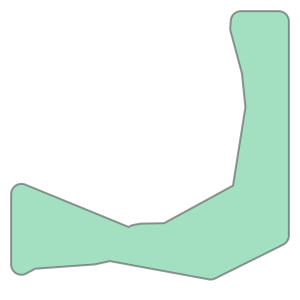

In [72]:
from shapely.geometry import Polygon

# Define the polygon
coords = [(234.05701071210206, -426.2345753745176), (234.05701071210206, -842.3704404545737), (101.80829243990593, -908.0569693441503), (-94.26643598638475, -871.8671562173404), (-125.97456867358414, -878.8181434157304), (-244.86382373329252, -887.4396145516075), (-265.94298928789794, -898.7948271218631), (-265.94298928789794, -761.9939601814776), (-56.88050308561651, -847.7332703354768), (-44.7469805929577, -841.6334319766611), (-32.36326742731035, -839.2568748276681), (16.541889317100868, -838.4126706901006), (163.5838140437845, -758.2552279983647), (189.68238902231678, -593.4453788585961), (182.48261975456262, -523.9028528416529), (159.98180121765472, -440.2044087648392), (160.32643258548342, -435.1374037093483), (160.9301607803879, -426.2345753745176), (234.05701071210206, -426.2345753745176)]
poly = Polygon(coords)

# Clean the polygon and calculate the centroid
clean_poly = poly.buffer(20)
centroid = clean_poly.centroid

# Check if the centroid is inside the polygon
if poly.contains(centroid):
    print("The centroid is inside the polygon.")
else:
    print("The centroid is outside the polygon.")


clean_poly
